<a href="https://colab.research.google.com/github/varunsawhney8/Projects/blob/main/Petrol_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name:** Petrol Price Forecasting  using Tensor Flow and Auto Keras

###### Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

###### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

###### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

## TimeLine of the project:
- Data Analysis
- Model Building and predictions using ML techniques such as Arima Model
- Model Building and predictions using DL techniques such as LSTM Model
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [7]:
df1 = pd.read_csv("/content/train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [12]:
df1.shape

(813, 2)

In [8]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


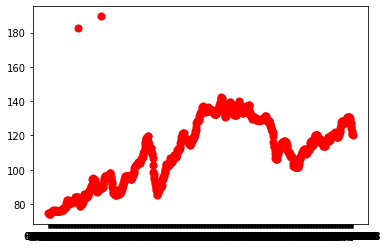

In [11]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

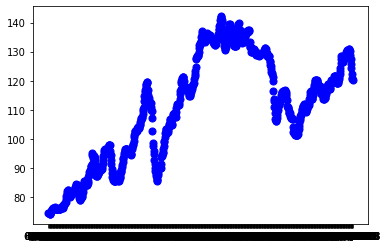

In [13]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)


In [14]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [16]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [17]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [18]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

# LSTM 

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
X_train.shape

(424, 100, 1)

In [21]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 358ms/step - loss: 0.2207 - val_loss: 0.0365
Epoch 2/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0396 - val_loss: 0.0173
Epoch 3/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0261 - val_loss: 0.0049
Epoch 4/100
7/7 [==============================] - 1s 176ms/step - loss: 0.0140 - val_loss: 0.0095
Epoch 5/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0113 - val_loss: 0.0051
Epoch 6/100
7/7 [==============================] - 1s 176ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 7/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 8/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 9/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 10/100
7/7 [==============================] - 1s 178ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 11/

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

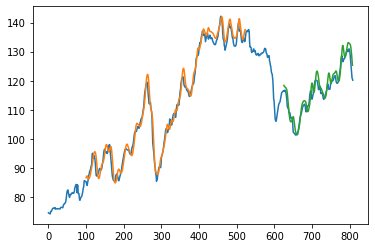

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [27]:
model.save("prtrol price prediction")

INFO:tensorflow:Assets written to: prtrol price prediction/assets


INFO:tensorflow:Assets written to: prtrol price prediction/assets


## **Using ARIMA**

In [28]:
!pip install --upgrade patsy

In [29]:
!pip install statsmodels

In [30]:
!pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 7.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [31]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [36]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670595, 119.52143346, 119.30634687, 119.14818591,
       119.02925476, 118.93899197, 118.87071704, 118.81917608,
       118.78030427, 118.75097698, 118.72883999, 118.71212989,
       118.69951735, 118.68999809, 118.68281349, 118.67739086,
       118.67329807, 118.67020899, 118.66787749, 118.66611776,
       118.66478959, 118.66378715, 118.66303054, 118.66245949,
       118.66202848, 118.66170318, 118.66145765, 118.66127233,
       118.66113246, 118.6610269 ])

# Using Auto ML

 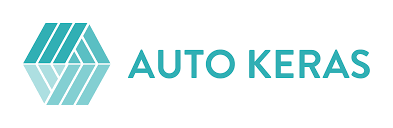

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [37]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-irj67f2n
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-irj67f2n
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=336e5b631f5377de5f465c59c33fb9fc08af188ed4ab8eb72b0ba17699d65c65
  Stored in directory: /tmp/pip-ephem-wheel-cache-edjboih0/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=6aa4e3da392a9592b1fbd299a78e40faa4caa1cac7046dd00895d51df03adf42
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables


In [1]:
!pip install autokeras

In [2]:
!pip show autokeras

Name: autokeras
Version: 1.0.16
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: Data Analytics at Texas A&M (DATA) Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-tuner, scikit-learn, tensorflow, packaging, pandas
Required-by: 


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [4]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [ ]:
X_train,y_train

In [21]:
reg.fit(x=X_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
Epoch 1/47
14/14 [==============================] - 1s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 2/47
14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 3/47
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 4/47
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 5/47
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 6/47
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 7/47
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 8/47
14/14 [==============================] - 0s 3ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 9/47
14/14 [==============================] - 0s 2ms/step - loss: 0.0042 - mean_squared_erro

In [22]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


MAE: 0.002
6/6 [==============================] - 0s 4ms/step


In [23]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0         
_________________________________________________________________
regression_head_1 (Dense)    (None, 1)                 33    

In [24]:
yhat_train= reg.predict(X_train)

14/14 [==============================] - 0s 2ms/step


In [25]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
print("MSE error for test data: ",np.sqrt(mean_squared_error(ytest,yhat_test)))
print("MSE error for traindata: ",np.sqrt(mean_squared_error(y_train,yhat_train)))

MSE error for test data:  0.04859831646424905
MSE error for traindata:  0.04811952603511415
